<a href="https://colab.research.google.com/github/Nadia-Mas/Breast-Cancer-Survivability/blob/main/Breast_cancer_survivability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Visualization**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (22,5)
plt.rcParams['figure.dpi'] = 100

In [ ]:
df = pd.read_csv(r"/content/Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


**1-1. Cheking Data**

In [ ]:
df.shape

(4024, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

**1-2. Creating Features**

In [ ]:
# Creating some new features 
# Assuming Age mentioned is age when diagonises was done as the other column suggest "Survival months"
df['Final Age']=df['Survival Months']/12+df['Age']
# df['Test Age']=df['Age']-df['Survival Months']/12
df['Final Age']=df['Final Age'].round()
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Final Age
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,73.0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,55.0
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive,64.0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,65.0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,51.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0
Final Age,4024.0,59.913767,9.154338,31.0,53.0,60.0,67.0,78.0


In [ ]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'Final Age'],
      dtype='object')

**1-3.Data Visualization**


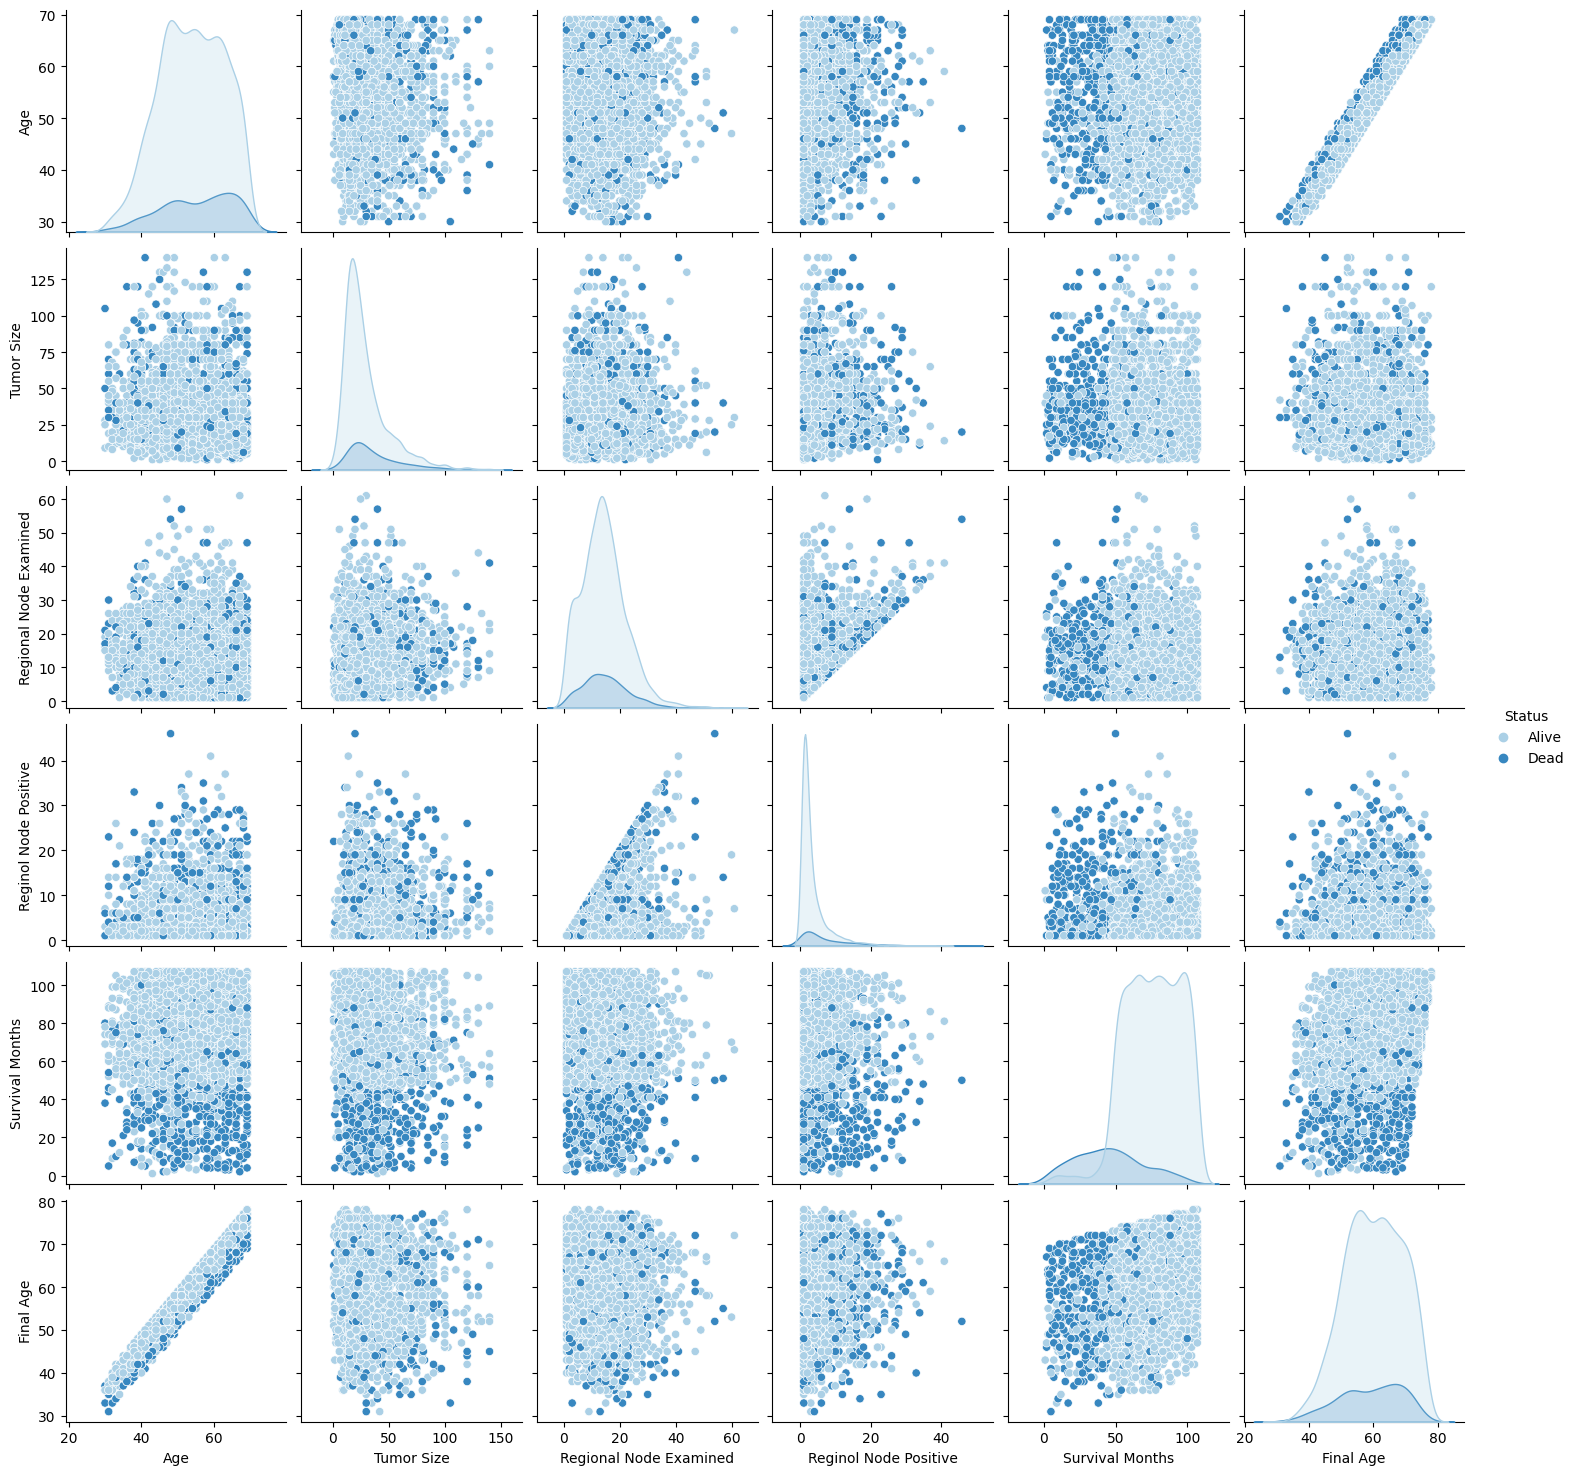

In [ ]:
plt.rcParams['font.size']= 10
sns.pairplot(df,hue='Status', palette='Blues')

verifying the correlation between our variables.
Checking the correlation between our variables, here we can see that we don't have a strong correlation between the variables:

<Axes: >

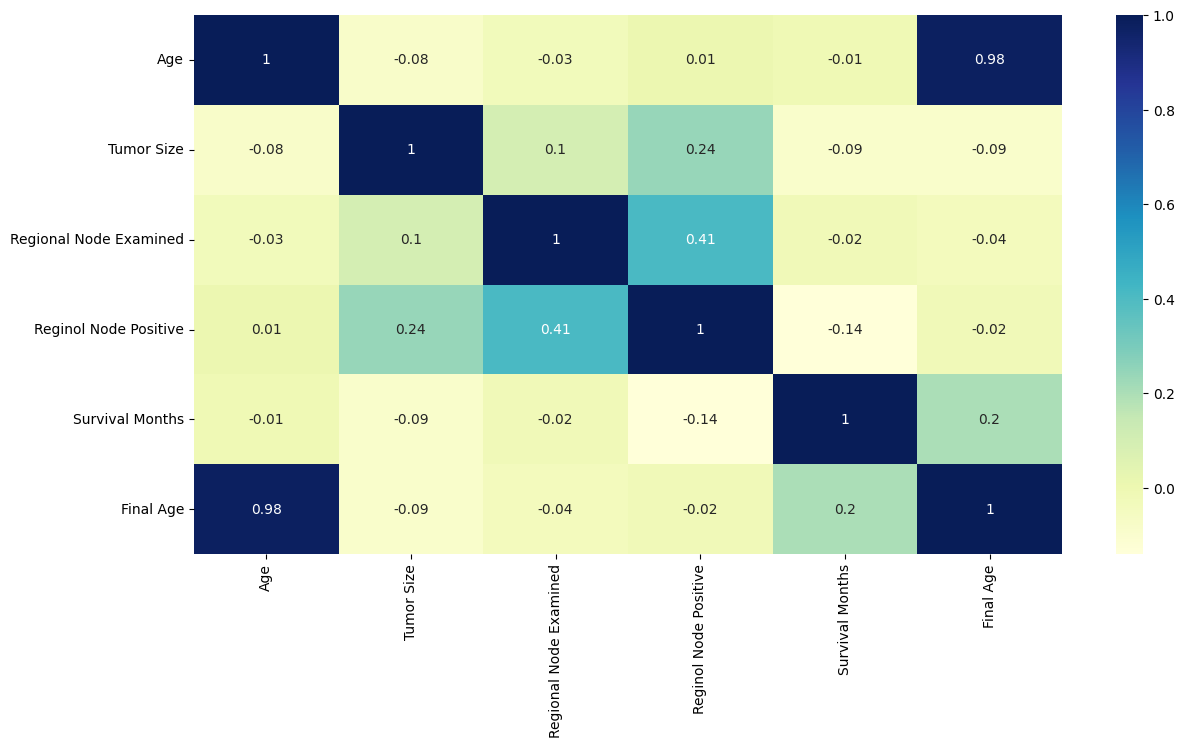

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')

**"Categorical Variables"**

Looking at our variable "Race" we can see that we have more white people, most people in our database are married, when we look at T-Stage we have more concentration on T1 and T2 stage, when we look at N Stage we have more concentration in N1, looking at our "differentiate" variable we can see that most of them are moderately differentiated, most of them are Regional, with Estrogen and Progesterone Positive and when we look at our target variable we can see that we have more people alive than dead:

<Axes: xlabel='Status', ylabel='count'>

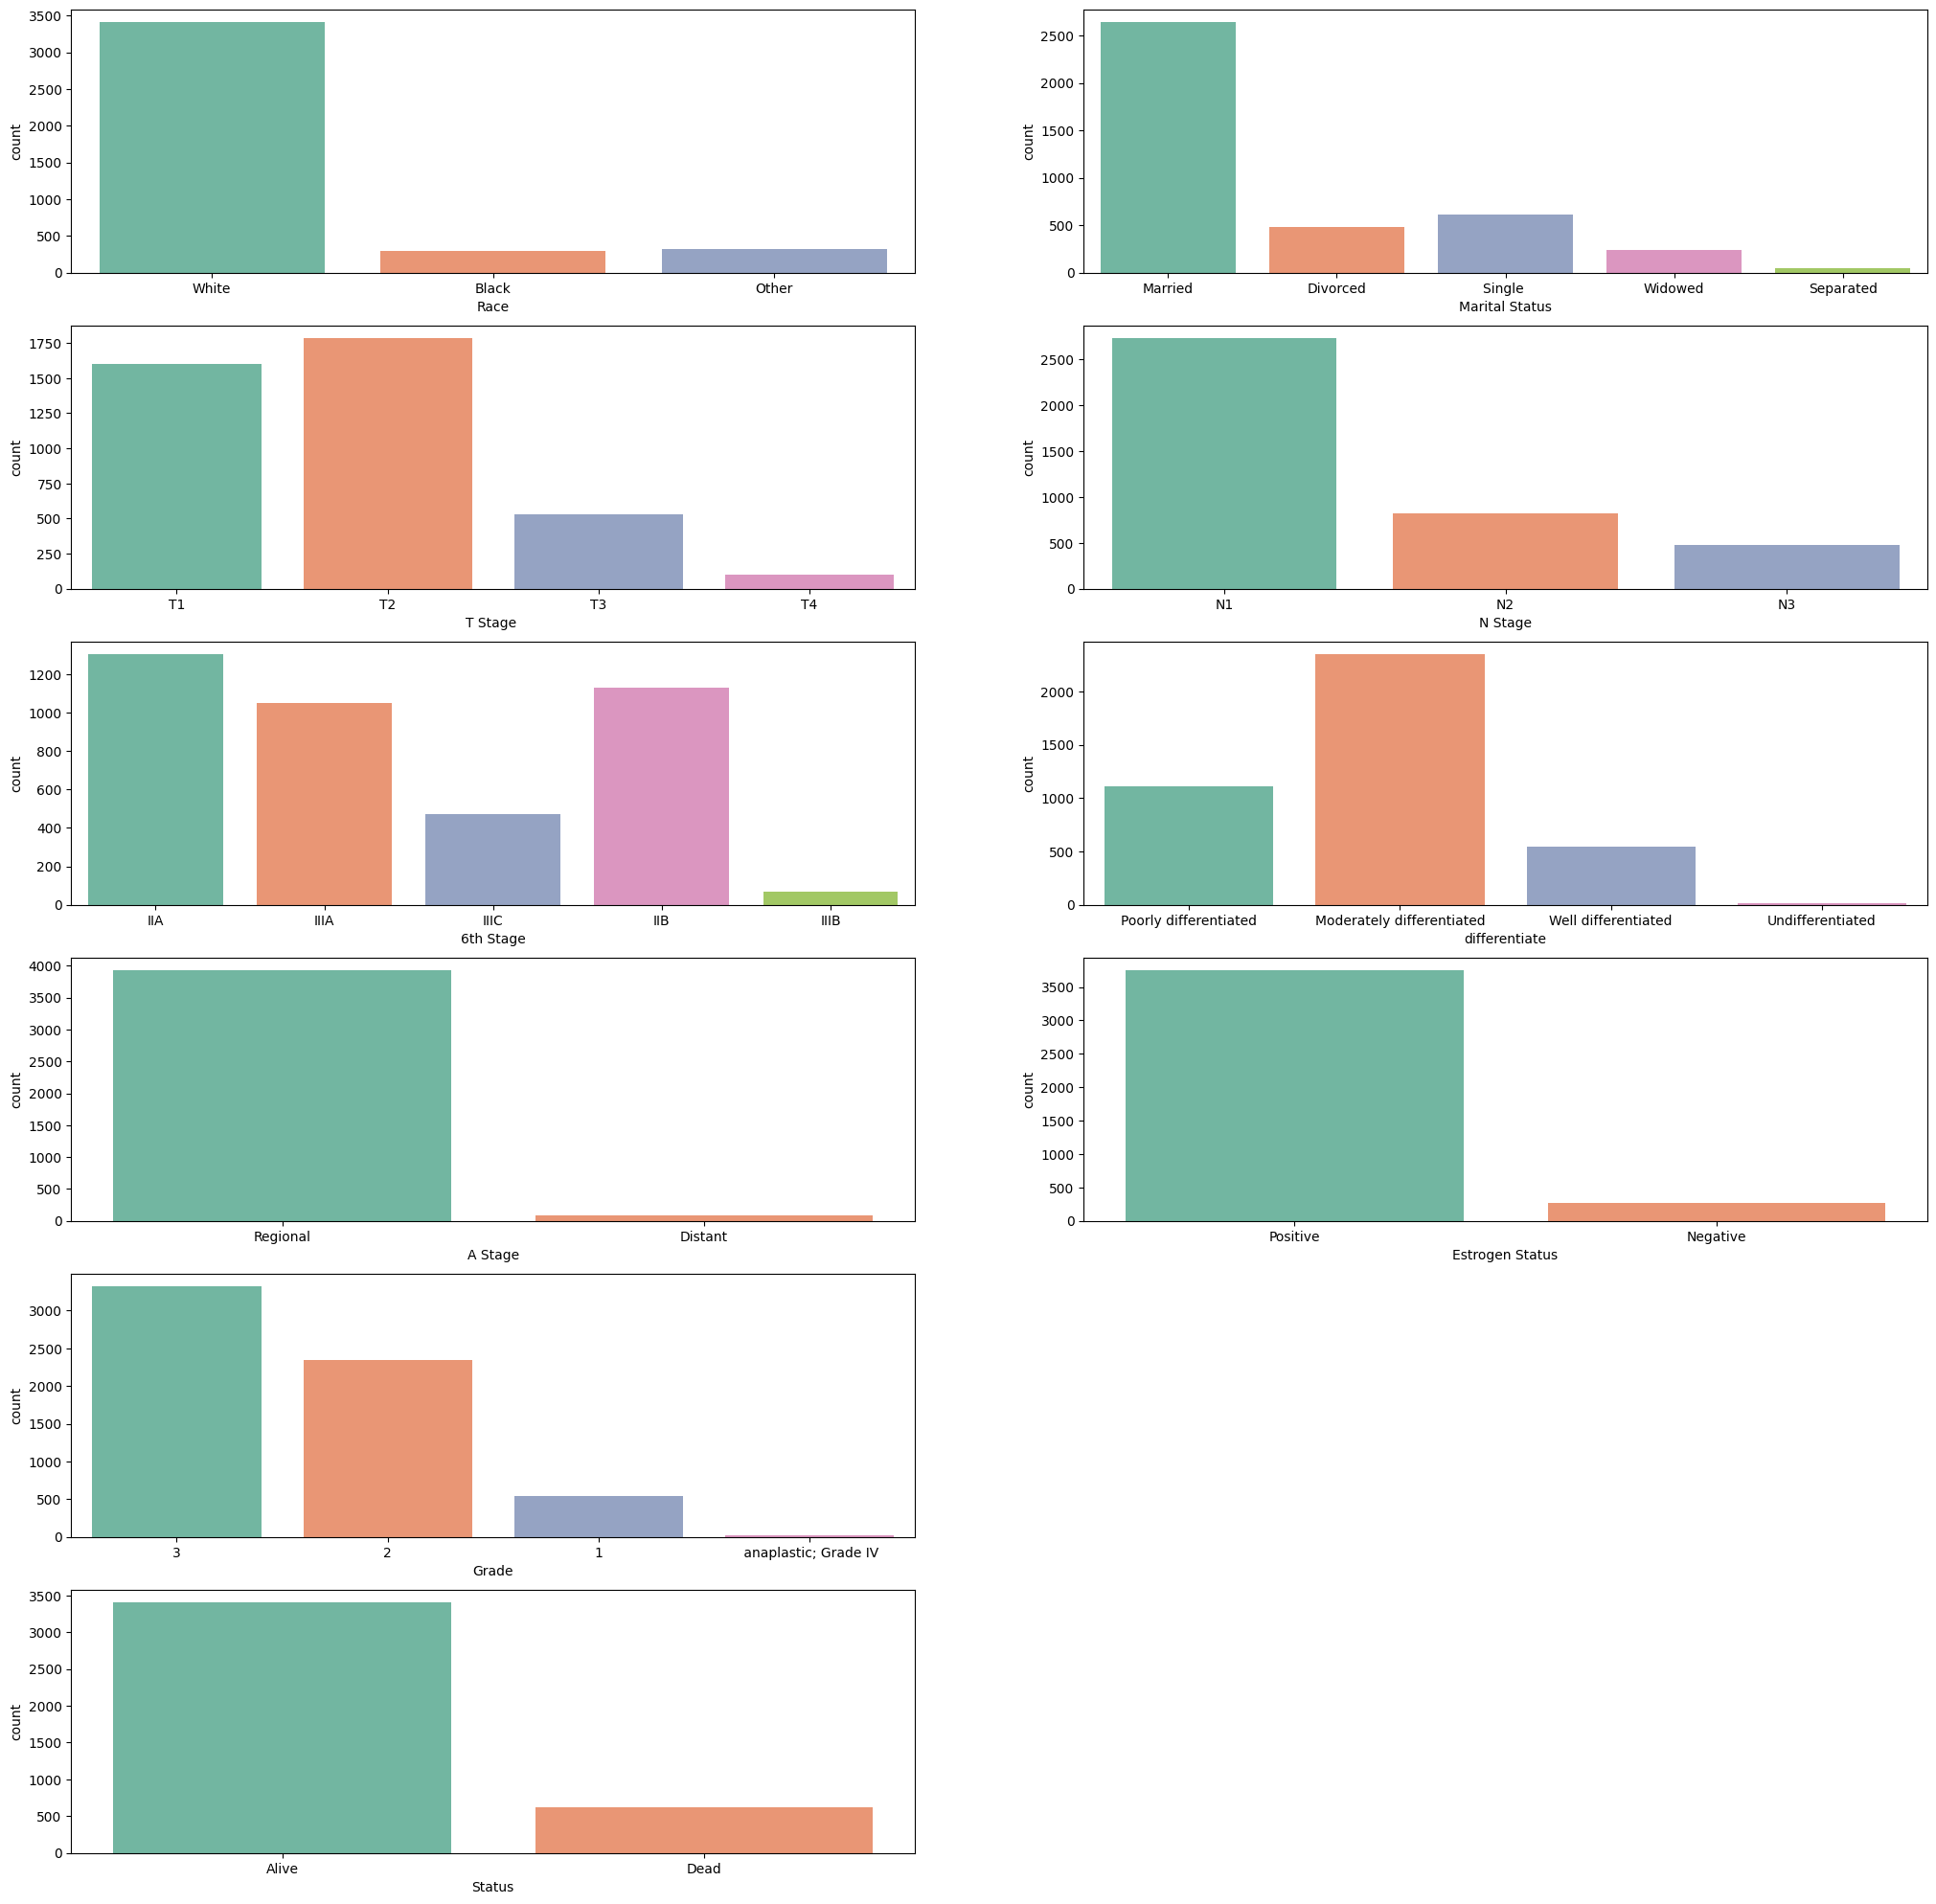

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(6,2,1)
sns.countplot(x = 'Race', palette='Set2', data = df)

plt.subplot(6,2,2)
sns.countplot(x = 'Marital Status', palette='Set2', data = df)

plt.subplot(6,2,3)
sns.countplot(x = 'T Stage ', palette='Set2', data = df)

plt.subplot(6,2,4)
sns.countplot(x = 'N Stage', palette='Set2', data = df)

plt.subplot(6,2,5)
sns.countplot(x = '6th Stage', palette='Set2', data = df)

plt.subplot(6,2,6)
sns.countplot(x = 'differentiate', palette='Set2', data = df)

plt.subplot(6,2,7)
sns.countplot(x = 'A Stage', palette='Set2', data = df)

plt.subplot(6,2,8)
sns.countplot(x = 'Estrogen Status', palette='Set2', data = df)

plt.subplot(6,2,9)
sns.countplot(x = 'Progesterone Status', palette='Set2', data = df)

plt.subplot(6,2,9)
sns.countplot(x = 'Grade', palette='Set2', data = df)

plt.subplot(6,2,11)
sns.countplot(x = 'Status', palette='Set2', data = df)

In [ ]:
df['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [ ]:
df['Marital Status'].value_counts()

Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

In [ ]:
df['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

In [ ]:
df['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

In [ ]:
df['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

In [ ]:
df['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

In [ ]:
df['A Stage'].value_counts()

Regional    3932
Distant       92
Name: A Stage, dtype: int64

In [ ]:
df['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

In [ ]:
df['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

In [ ]:
df['Grade'].value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [ ]:
df['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

**"Continuous Variables"**

Looking at our continuous variables we can see that we have more elderly people in our base, we have a peak at 50-55-60 years old, when we look at the Regional Node Examined we can see that our top is around 15 and that most of our data is within 0-20, when we look at the Regionol Node Positive variable we can see pretty much the same behavior as the Regional Node Examined, most of the data is between 0-10 and the peak at 2, when we look at the variable Tumor Size we can see that we have the peak at 20 and that most of the data are at 15-25, when we look at the Survival Months variable we can see that the smaller the value of the variable the less values ​​we have, the vast majority are between 60 and 100.

<Axes: xlabel='Survival Months'>

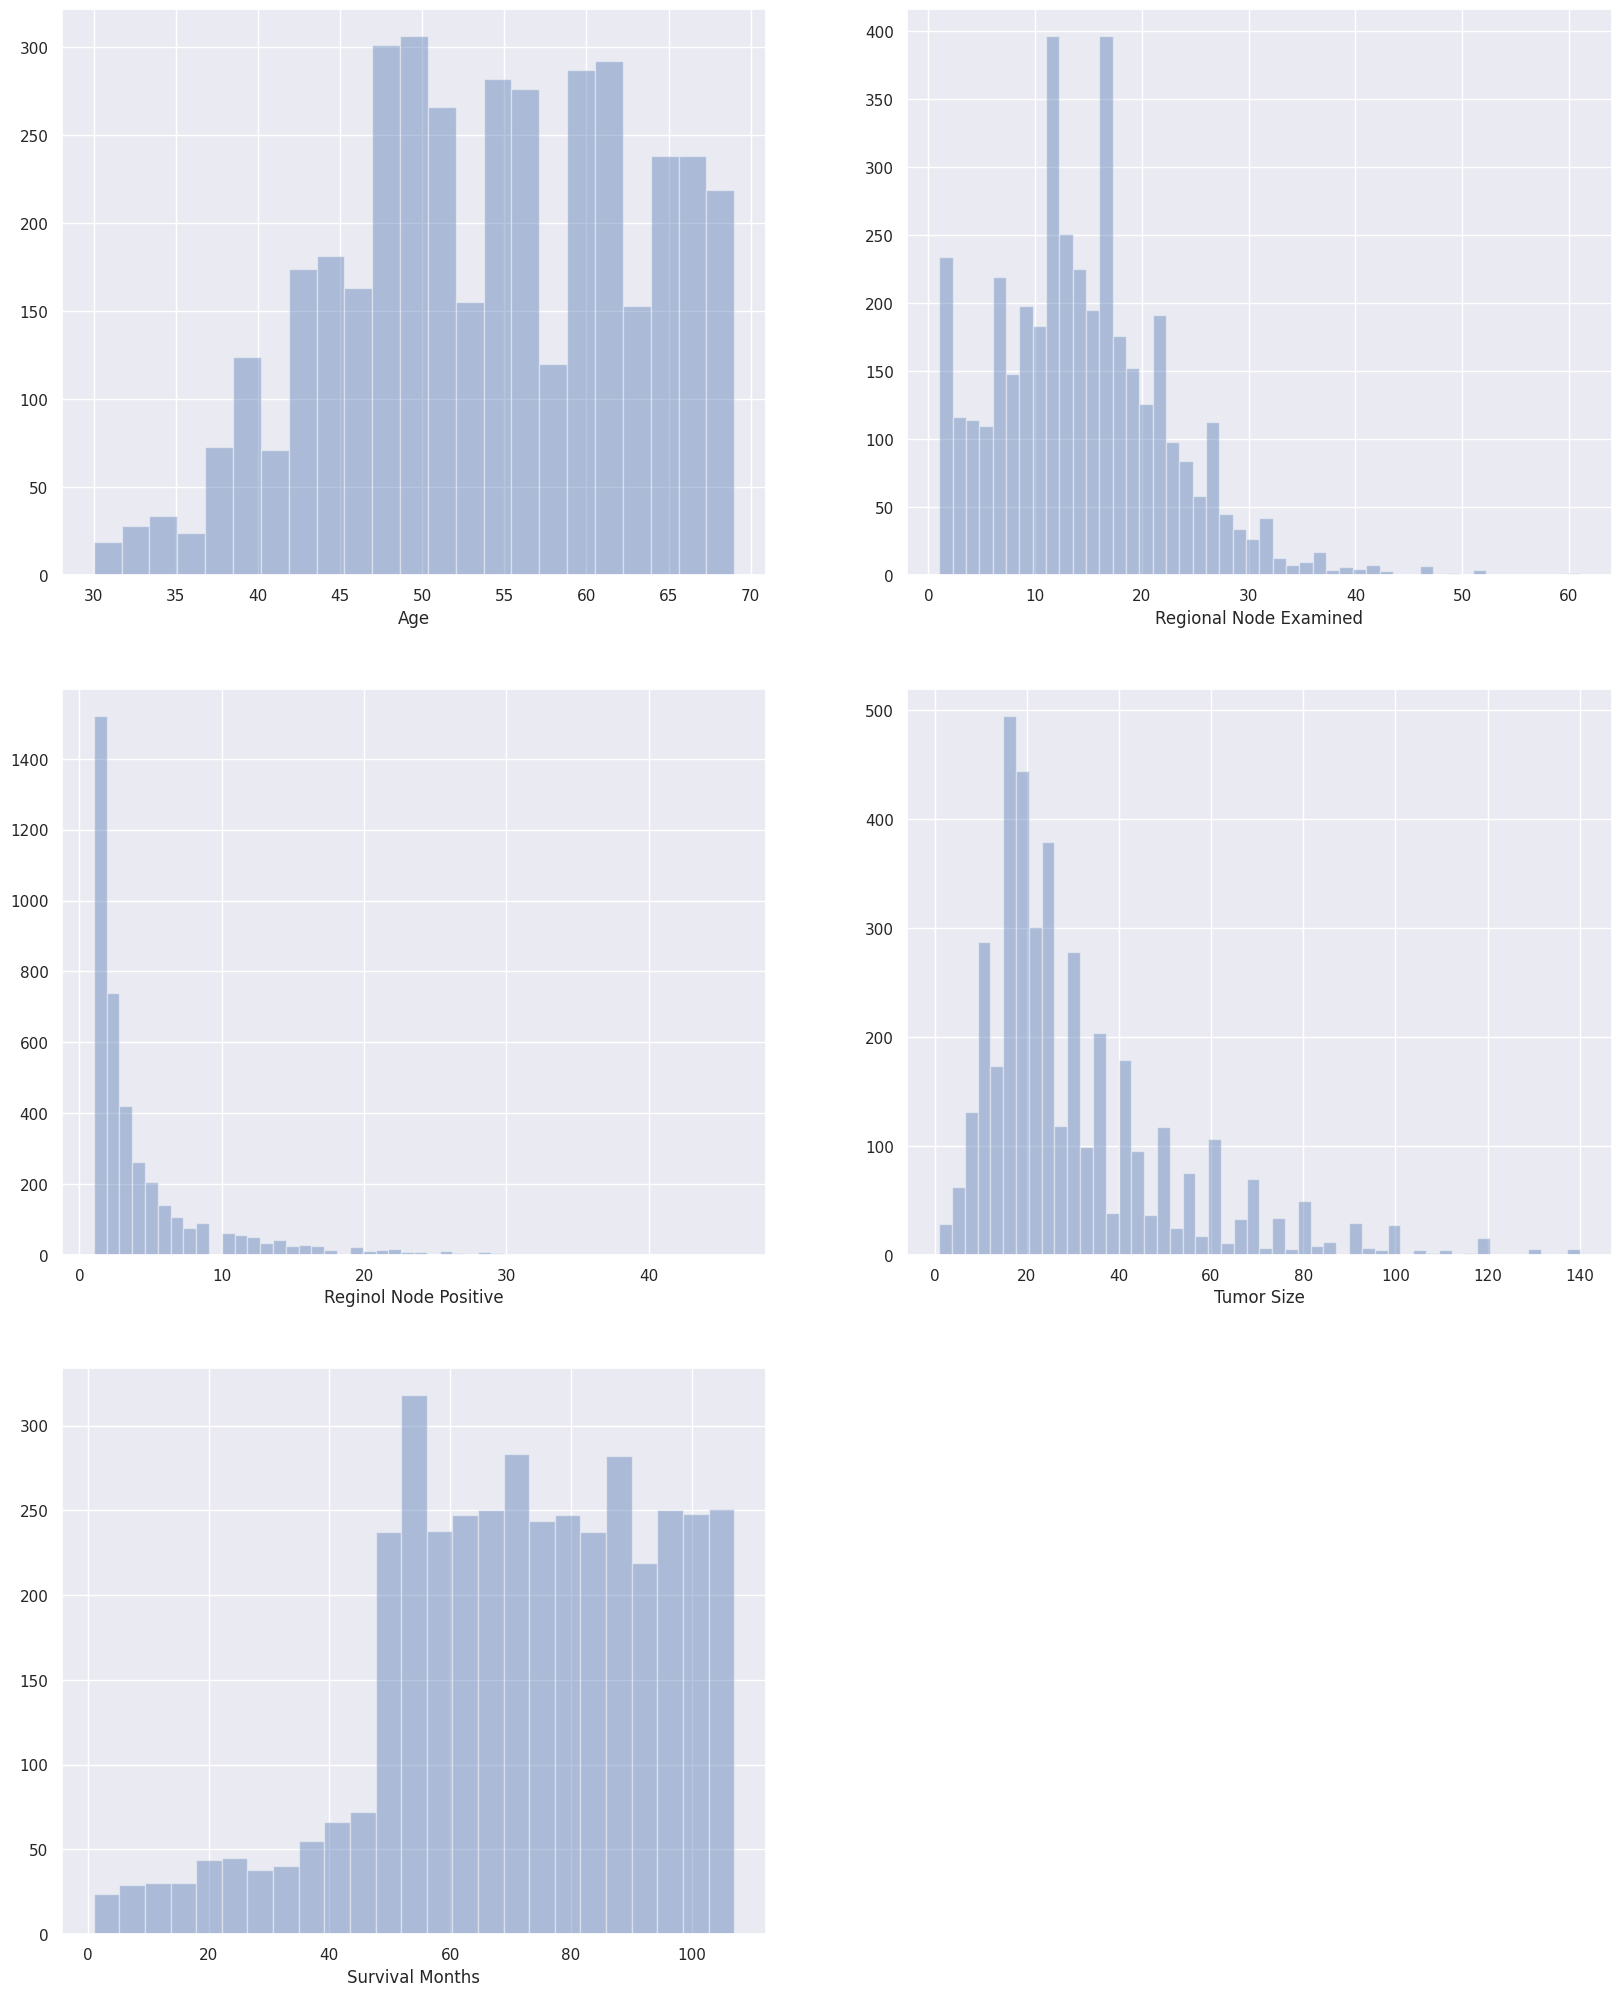

In [ ]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(df.Age, kde = False)

plt.subplot(3,2,2)
sns.distplot(df['Regional Node Examined'], kde = False)

plt.subplot(3,2,3)
sns.distplot(df['Reginol Node Positive'], kde = False)

plt.subplot(3,2,4)
sns.distplot(df['Tumor Size'] , kde = False)

plt.subplot(3,2,5)
sns.distplot(df['Survival Months'], kde = False)

**"Bivariate Analysis"**

Looking at our categorical variables comparing with our target variable I couldn't see a very different behavior.
Looking at our target variable comparing with our explanatory variables we can see that Single people have a good difference compared to pairs when we look at people who will die or live, when we look at the Differentiate variable we can see that "Well Differentiated" people have a difference when comparing when the person will live or die, in the N Stage variable we can verify this difference also with the value of N3, looking at the 6th stage variable we can have a good insight, people with #A usually don't have big problems, unlike the person who have IIIC who generally have more problems with Brain Stroke than the other variable values

<Axes: xlabel='Status', ylabel='count'>

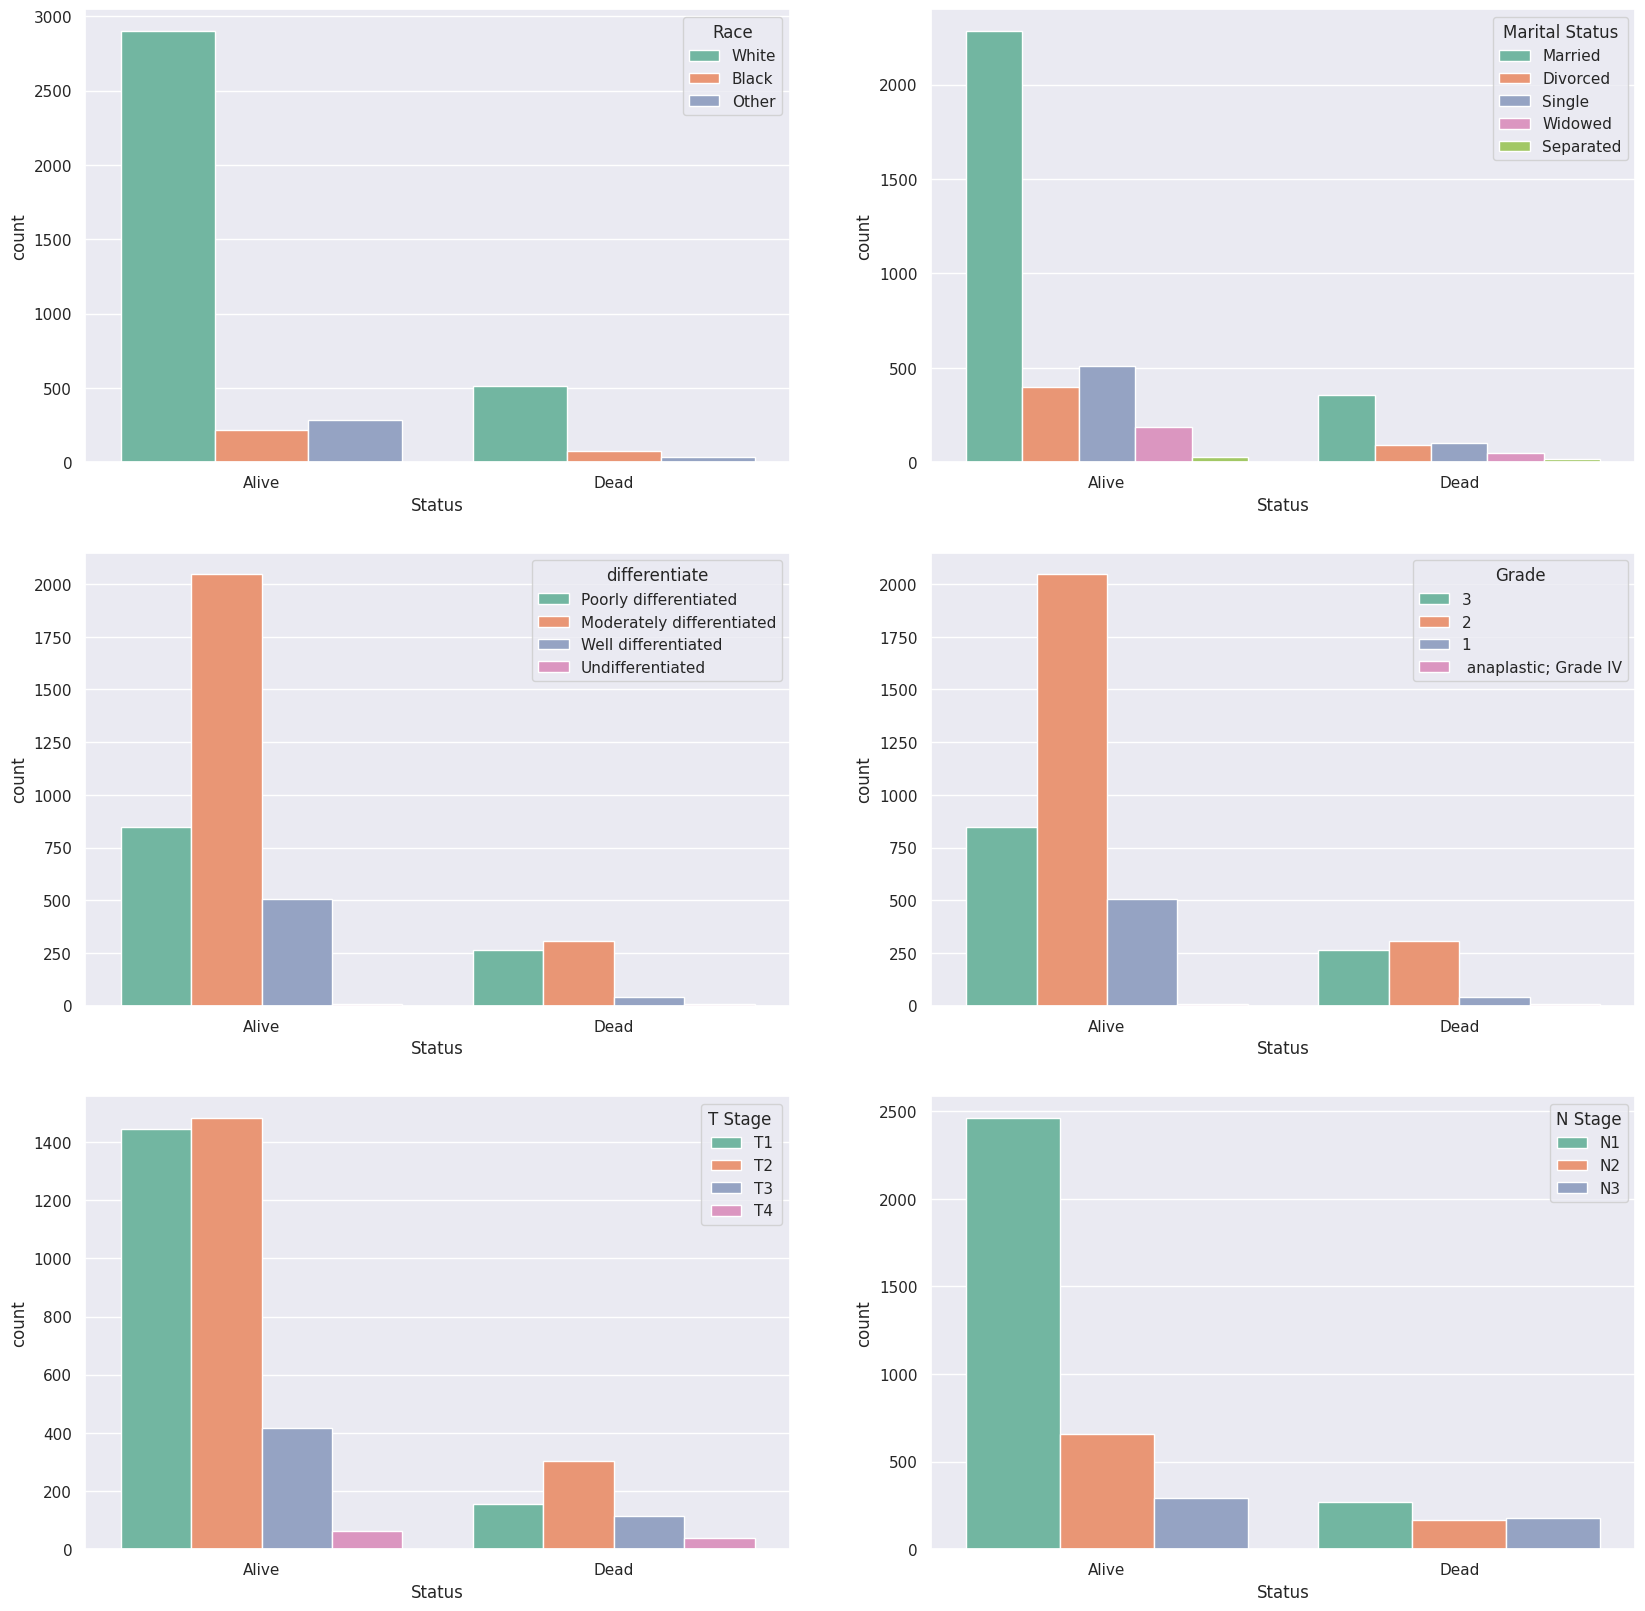

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Status', hue= 'Race', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Status', hue= 'Marital Status', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Status', hue= 'differentiate', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Status', hue= 'Grade', palette='Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'Status', hue= 'T Stage ', palette='Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'Status', hue= 'N Stage', palette='Set2', data = df)

<Axes: xlabel='Status', ylabel='count'>

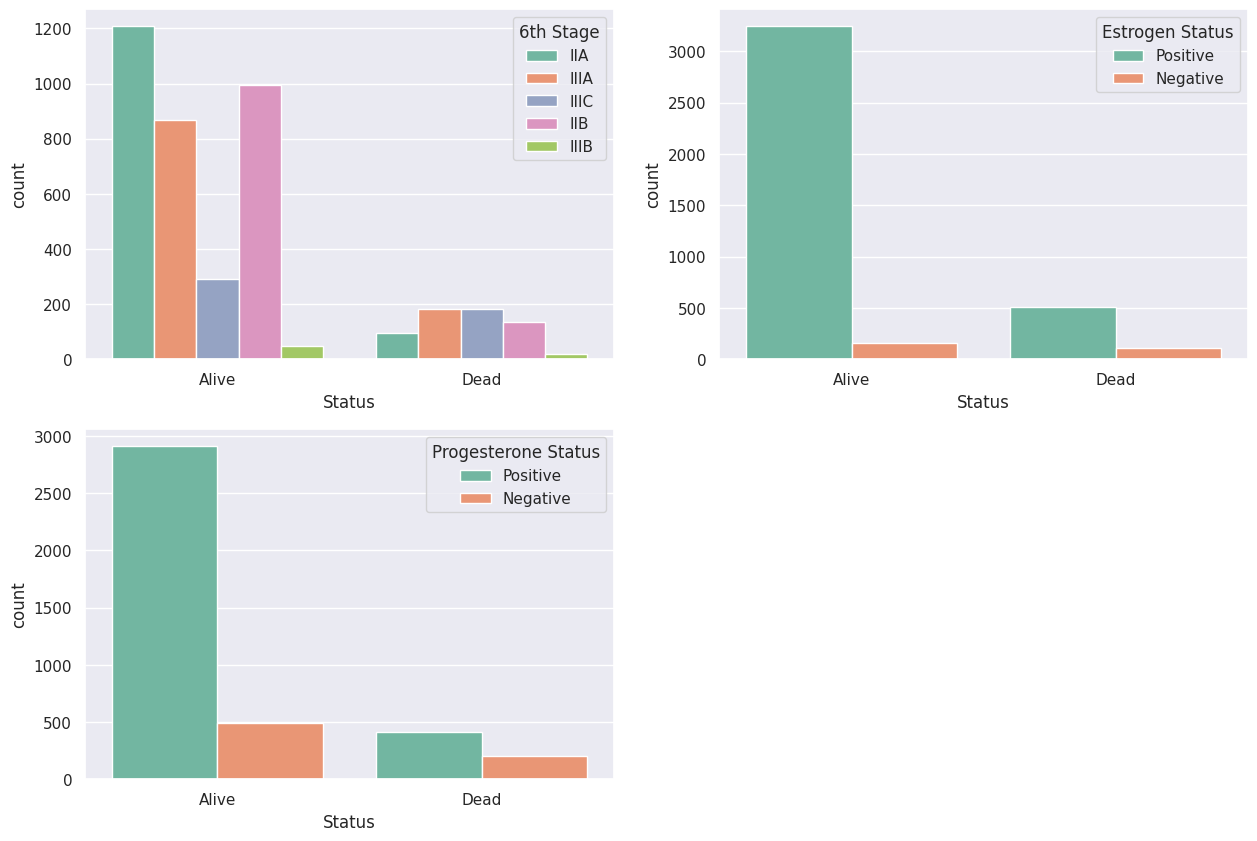

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'Status', hue= '6th Stage', palette='Set2', data = df)

plt.subplot(2,2,2)
sns.countplot(x = 'Status', hue= 'Estrogen Status', palette='Set2', data = df)

plt.subplot(2,2,3)
sns.countplot(x = 'Status', hue= 'Progesterone Status', palette='Set2', data = df)

In the Age variable we can see that we do not have an age standard to influence the result:

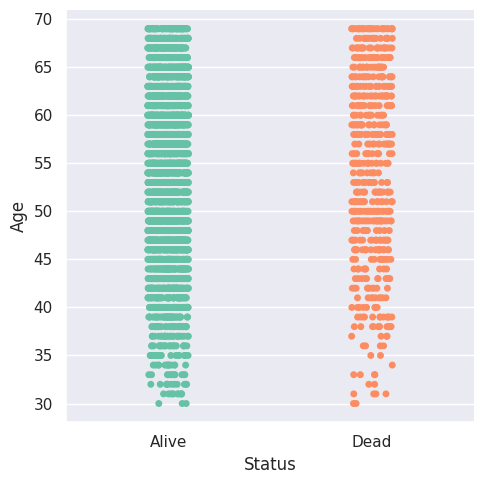

In [ ]:
sns.catplot(x = "Status", y = "Age", palette = "Set2", data = df)

Same thing for the Tumor Size variable, we don't have much difference when we look at our Target variable:

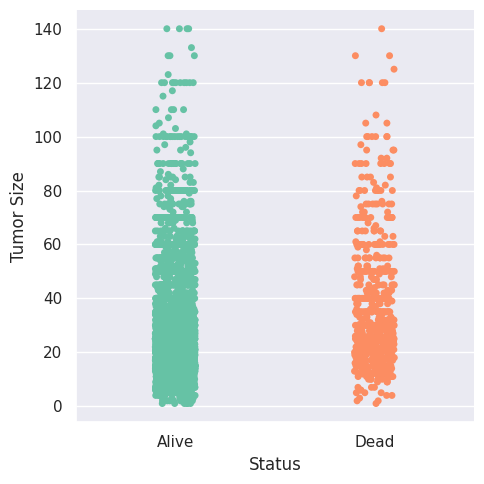

In [ ]:
sns.catplot(x = "Status", y = "Tumor Size", palette = "Set2", data = df)

This variable is interesting, we can see that people with higher levels are less likely to die:

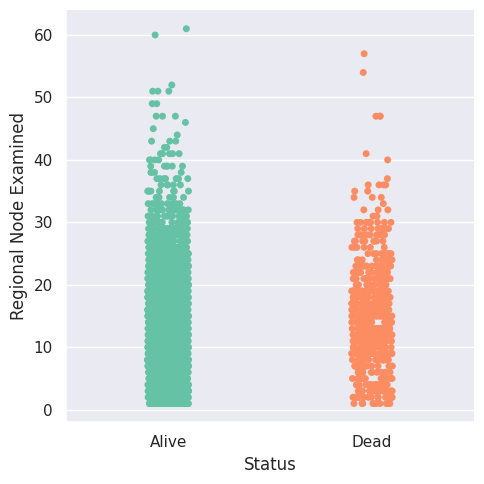

In [ ]:
sns.catplot(x = "Status", y = "Regional Node Examined", palette = "Set2", data = df)

The behavior is similar in both variables:

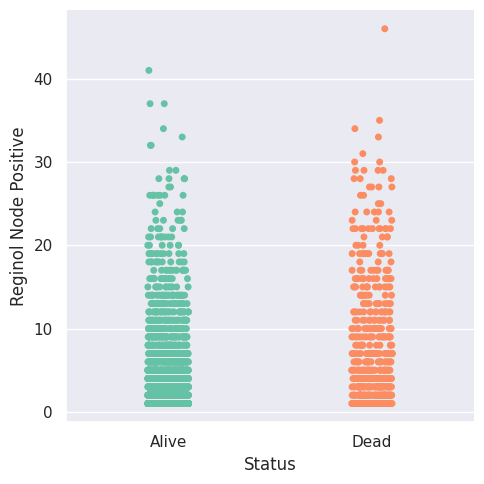

In [ ]:
sns.catplot(x = "Status", y = "Reginol Node Positive", palette = "Set2", data = df)

Here in this variable we can see that people with higher values ​​in Survival Months are less likely to die:

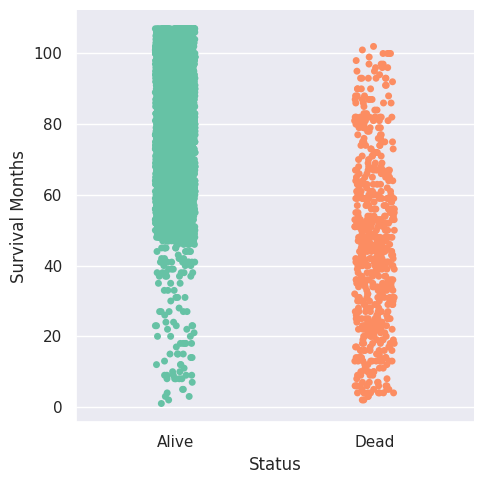

In [ ]:
sns.catplot(x = "Status", y = "Survival Months", palette = "Set2", data = df)

Comparing our Survival Months Variable with Age we can see the behavior seen above, the longer the Survival Months the less likely a person is to die, and when we look at the age variable we don't have much difference between death between adults and young people:

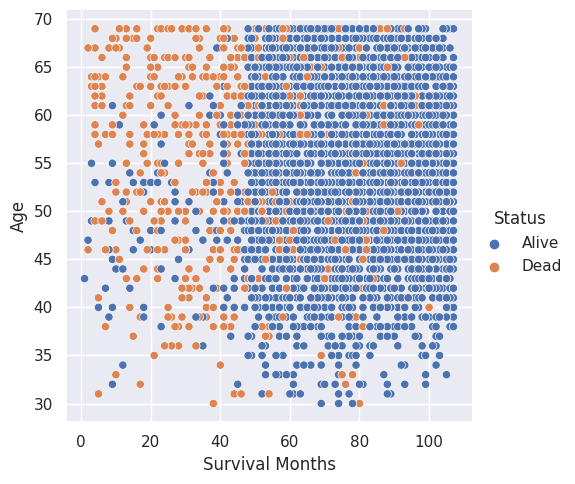

In [ ]:
sns.relplot(x='Survival Months', y = 'Age', hue = "Status", data = df)

Comparing our Survival Months Variable with Regional Node Positive we can see the behavior seen before, the longer the Survival Months the less likely a person is to die, and when we look at the Regionol node Positive variable we don't have much difference between death and life:

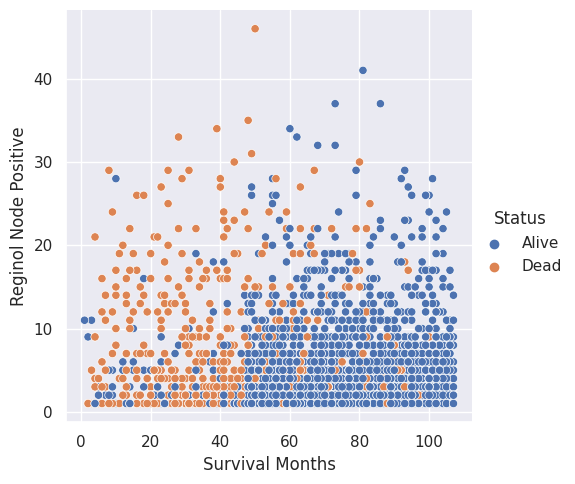

In [ ]:
sns.relplot(x='Survival Months', y = 'Reginol Node Positive', hue = "Status", data = df)

Comparing our Survival Months Variable with Regional Node Examined we can see the behavior seen before, the longer the Survival Months the less likely a person is to die, and when we look at the Regional node Examined variable we don't have much difference between death and life:

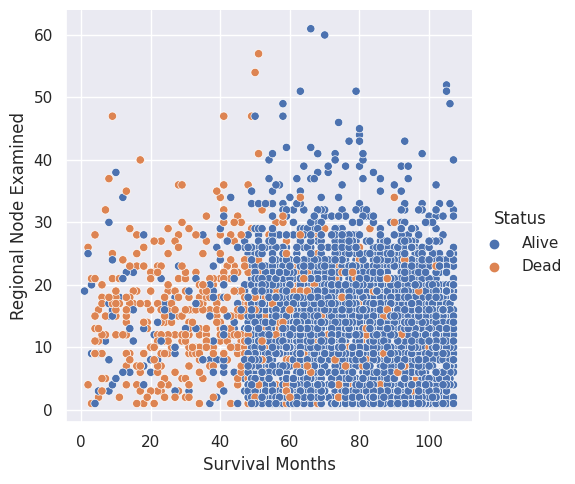

In [ ]:
sns.relplot(x='Survival Months', y = 'Regional Node Examined', hue = "Status", data = df)

Comparing our Survival Months Variable with TumorSize we can see the behavior seen before, the longer the Survival Months the less likely a person is to die, and when we look at the Tumor Size variable we don't have much difference between death and life:

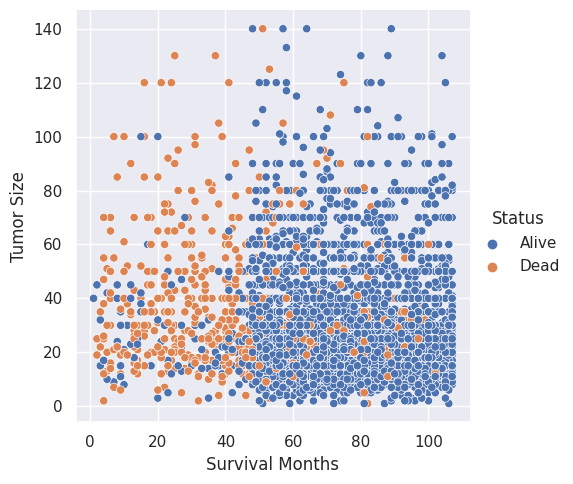

In [ ]:
sns.relplot(x='Survival Months', y = 'Tumor Size', hue = "Status", data = df)

**Building the Model**

Separating into features variables and target variable

In [ ]:
X = df.iloc[:, 0:15].values
y = df.iloc[:, 15].values


**Balancing Classes**

Analyzing the data we can see that we have a lot more data with Non Alive, so the models will learning more about this data than when the person Alive and can't learn about when this person will has Die, then we need to balance the classes and see what we can do with this data.
Here we use the function **OverSampling** and **SMOTE** to balancing the classes, we are doing a Oversampling and both target variable will have the same number of samples.

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, KMeansSMOTE, BorderlineSMOTE, SVMSMOTE

In [ ]:
ros = RandomOverSampler(random_state=0)

In [ ]:
X, y = ros.fit_resample(X, y)

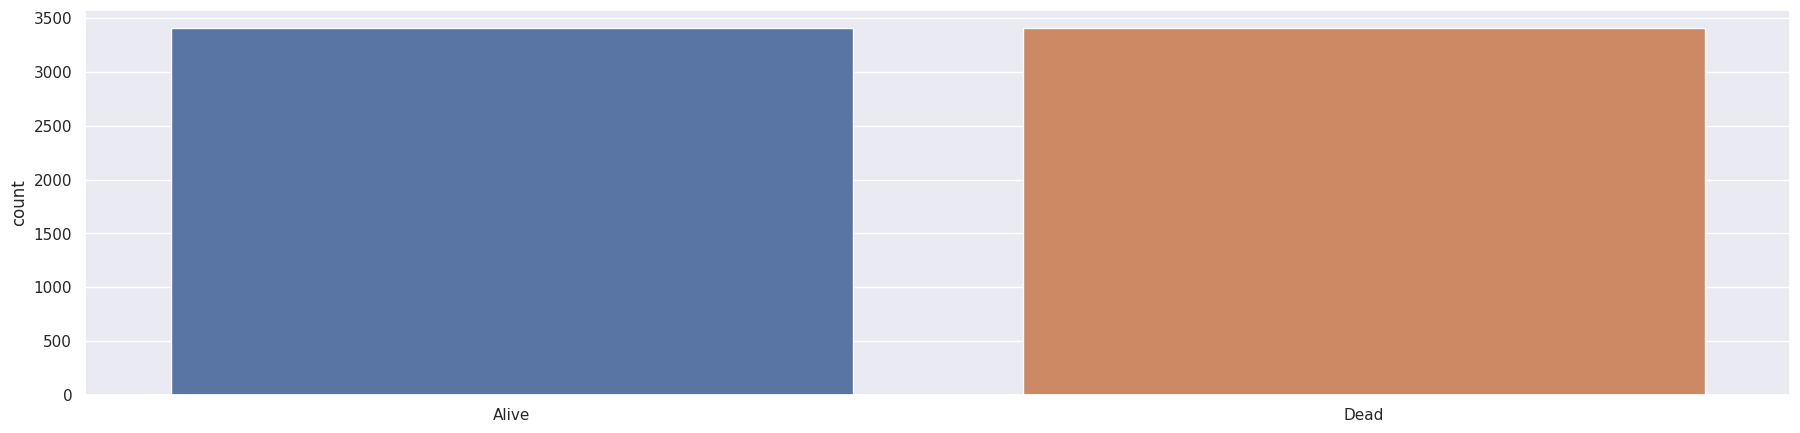

In [ ]:
ax = sns.countplot(x=y)